# Lista Bônus de Machine Learning 

Fernanda Garcia e Julia Duó 

## Outline 

1. Load Libraries 
2. Exercise 1 
3. Exercise 2
4. Exercise 3

### Load Libraries

In [183]:
### EXERCÍCIO 1 

import seaborn as sns
import pandas as pd
import numpy as np
from math import log,exp
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)
import graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import median_absolute_error, mean_absolute_error, r2_score, max_error, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import io


### EXERCÍCIO 2 

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import os
from sklearn.decomposition import PCA
from scipy.stats import skew
plt.rcParams['figure.figsize'] = [15, 7.5]
import plotly.express as px
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import tree as sk_tree
from sklearn.metrics import median_absolute_error, mean_absolute_error, r2_score, max_error, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.preprocessing import MaxAbsScaler
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

SMALL_SIZE = 10
MEDIUM_SIZE = 12

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rcParams['figure.dpi']=150

### EXERCÍCIO 3 


import streamlit as st  
import plotly.graph_objects as go
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')


### Exercise 1

No notebook adaboost.py, iniciamos o desenvolvimento, "from scratch", do algoritmo Adaboost (M1). Tomando tal código como ponto de partida, pede-se.

1. (a) Crie uma função para implementação do Adaboost-M1, tendo como objetivo um problema de classificação binária, conforme discutido em aula. Para isso, você precisará generalizar o código em questão para permitir o crescimento de M árvores de decisão criadas sequencialmente. Note, portanto, que a função deverá ter, como argumento, o hiper-parâmetro que define o número de árvores a serem estimadas.

1. (b) Utilize a função criada no item (a) para treinar seu modelo no conjunto de treino do dataset de house prices, utilizado no notebook. Realize previsões no conjunto de teste, e calcule a acurácia de seu estimador

In [88]:
# Respondendo 1.1.a) e 1.1.b) 

# Aqui, mantemos um código para cada caminho do arquivo para facilitar rodar o código

df = pd.read_csv("/Users/fernandagarcia/Documents/FGV RI 2022.1/Machine Learning/31:03/data/house_prices/train.csv")
#df = pd.read_csv("C:/Users/jrogatoduo/Downloads/Machine Learning/fgv_ri_ml_2022-main (3)/fgv_ri_ml_2022-main/data/house_prices/train.csv")

In [89]:
# Como tivemos problemas, testamos sempre o código no colab e no jupyter 

#from google.colab import files
#uploaded = files.upload()
#df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
#df.head()

In [90]:
# ESTE CÓDIGO USA COMO REFERÊNCIA: https://towardsdatascience.com/adaboost-from-scratch-37a936da3d50

# Listing explanatory features

features = ['OverallQual', 'GrLivArea', 'GarageCars']
features_y = ['OverallQual', 'GrLivArea', 'GarageCars', 'SalePrice']

df = df[features_y]

In [91]:
df['SalePrice'] = pd.qcut(df['SalePrice'],q = 2, labels = [-1, 1])
df.head()

,OverallQual,GrLivArea,GarageCars,SalePrice
0,7,1710,2,1
1,6,1262,2,1
2,7,1786,2,1
3,7,1717,3,-1
4,8,2198,3,1


In [92]:
# Computando as medidas de erro e os pesos

## Error

def compute_error (y, y_pred, w_i):
    return (sum(w_i* (np.not_equal(y, y_pred)).astype(int)))/sum(w_i)

## Weights of weak classifiers 

def compute_alpha(error):
    return np.log((1-error) / error)

## Update weights after boosting interaction

def update_weights(w_i, alpha, y, y_pred):
    return w_i* np.exp(alpha * (np.not_equal(y, y_pred)).astype(int))

In [93]:
# ESTE CÓDIGO USA COMO REFERÊNCIA: https://towardsdatascience.com/adaboost-from-scratch-37a936da3d50

# Agora, vamos definir o AdaBoost 

class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.M = None
        self.training_errors = []
        self.prediction_errors = []

    def fit(self, X, y, M = 100):
        '''
        Fit model. Arguments:
        X: independent variables - array-like matrix
        y: target variable - array-like vector
        M: number of boosting rounds. Default is 100 - integer
        '''
        
        # Clear before calling
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        # Iterate over M weak classifiers
        for m in range(0, M):
            
            # Set weights for current boosting iteration
            if m == 0:
                w_i = np.ones(len(y)) * 1 / len(y)  # At m = 0, weights are all the same and equal to 1 / N
            else:
                # (d) Update w_i
                w_i = update_weights(w_i, alpha_m, y, y_pred)
            
            # (a) Fit weak classifier and predict labels
            G_m = DecisionTreeClassifier(max_depth = 1)     # Stump: Two terminal-node classification tree
            G_m.fit(X, y, sample_weight = w_i)
            y_pred = G_m.predict(X)
            
            self.G_M.append(G_m) # Save to list of weak classifiers

            # (b) Compute error
            error_m = compute_error(y, y_pred, w_i)
            self.training_errors.append(error_m)

            # (c) Compute alpha
            alpha_m = compute_alpha(error_m)
            self.alphas.append(alpha_m)

        assert len(self.G_M) == len(self.alphas)

    def predict(self, X):
        
        '''
        Predict using fitted model. Arguments:
        X: independent variables - array-like
        '''

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred  

In [94]:
train, test = train_test_split(df, test_size=0.3, random_state=7)

X_train = df[:train.shape[0]]
X_test = df[train.shape[0]:]
y_train = train.SalePrice
y_test = test.SalePrice

In [95]:
# Predict

ab = AdaBoost()
ab.fit(X_train, y_train, M = 400)

# Predict on test set
y_pred = ab.predict(X_test)
print('The ROC-AUC score of the model is:', round(roc_auc_score(y_test, y_pred), 4))

The ROC-AUC score of the model is: 0.5084


1. (c) Construa um gráfico apresentando como a acurácia preditiva do seu estimador varia na medida em que você aumenta o número de árvores de decisão. Discuta.

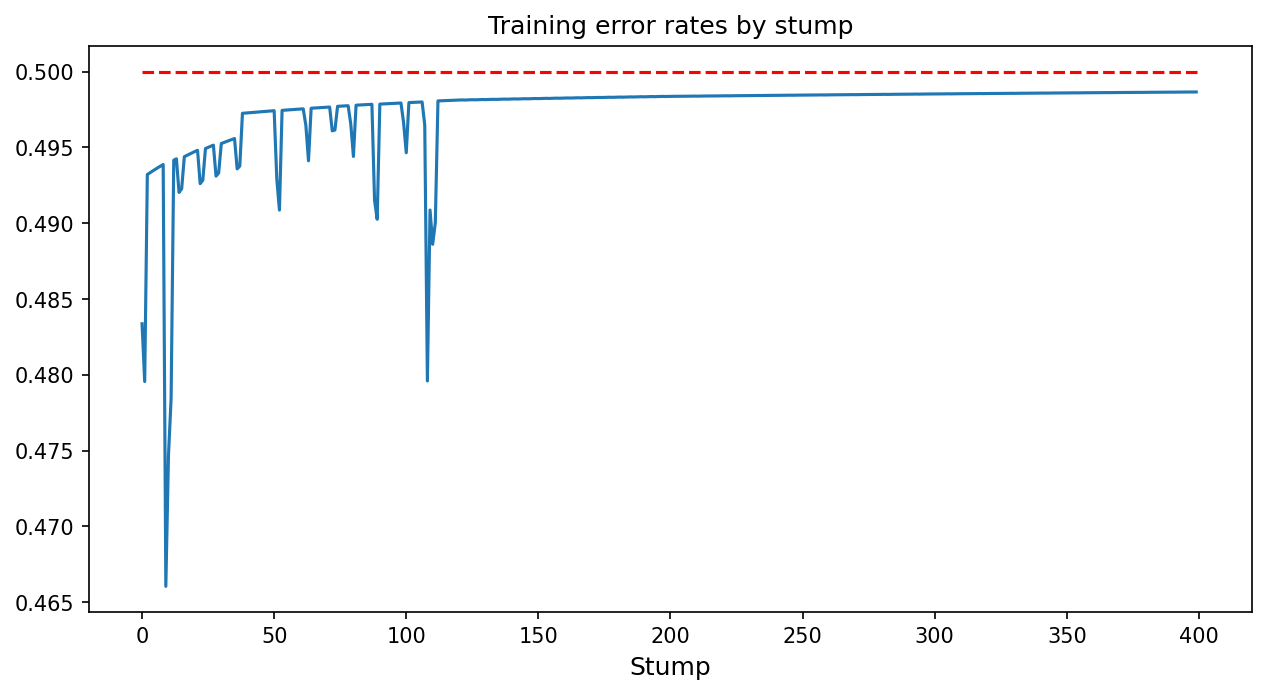

In [96]:
plt.figure(figsize=(10,5))
plt.plot(ab.training_errors)
plt.hlines(0.5, 0, 400, colors = 'red', linestyles='dashed')
plt.title('Training error rates by stump')
plt.xlabel('Stump')
plt.show()

2. (a) Generalize a função desenvolvida para que sua implementação do Adaboost utilize árvores de decisão de qualquer profundidade definida pelo usuário. Note que agora sua função deverá ter mais um argumento a ser definido pelo usuário, qual seja, a profundidade de seu base-learner (a árvore de decisão).

2. (b) Variando o novo hiperparâmetro, repita o treinamento e as projeções de seu algoritmo no conjunto de teste. Apresente um gráfico que mostre a evolução da acurácia de seu modelo na medida em que aumentamos a profundidade do base-learner, fixando o número de árvore treinadas a partir do valor ótimo obtido no item anterior.

In [97]:
# Respondendo 1.2.a) e 1.2.b) 

# ADICIONANDO MAX DEPTH 

class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.M = None
        self.training_errors = []
        self.prediction_errors = []
        self.M_dep = []

    def fit(self, X, y, M_dep = 1, M = 100):
        '''
        Fit model. Arguments:
        X: independent variables - array-like matrix
        y: target variable - array-like vector
        M_dep: Max depth with default 1
        M: number of boosting rounds. Default is 100 - integer
        '''
        
        # Clear before calling
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        # Iterate over M weak classifiers
        for m in range(0, M):
            
            # Set weights for current boosting iteration
            if m == 0:
                w_i = np.ones(len(y)) * 1 / len(y)  # At m = 0, weights are all the same and equal to 1 / N
            else:
                # (d) Update w_i
                w_i = update_weights(w_i, alpha_m, y, y_pred)
            
            # (a) Fit weak classifier and predict labels
            G_m = DecisionTreeClassifier(max_depth = M_dep)     # Stump: Two terminal-node classification tree
            G_m.fit(X, y, sample_weight = w_i)
            y_pred = G_m.predict(X)
            
            self.G_M.append(G_m) # Save to list of weak classifiers

            # (b) Compute error
            error_m = compute_error(y, y_pred, w_i)
            self.training_errors.append(error_m)

            # (c) Compute alpha
            alpha_m = compute_alpha(error_m)
            self.alphas.append(alpha_m)

        assert len(self.G_M) == len(self.alphas)

    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred      

In [98]:
# Predict

ab = AdaBoost()
ab.fit(X_train, y_train, M_dep = 40, M = 10)

# Predict on test set
y_pred = ab.predict(X_test)
print('The ROC-AUC score of the model is:', round(roc_auc_score(y_test, y_pred), 4))

The ROC-AUC score of the model is: 0.5044


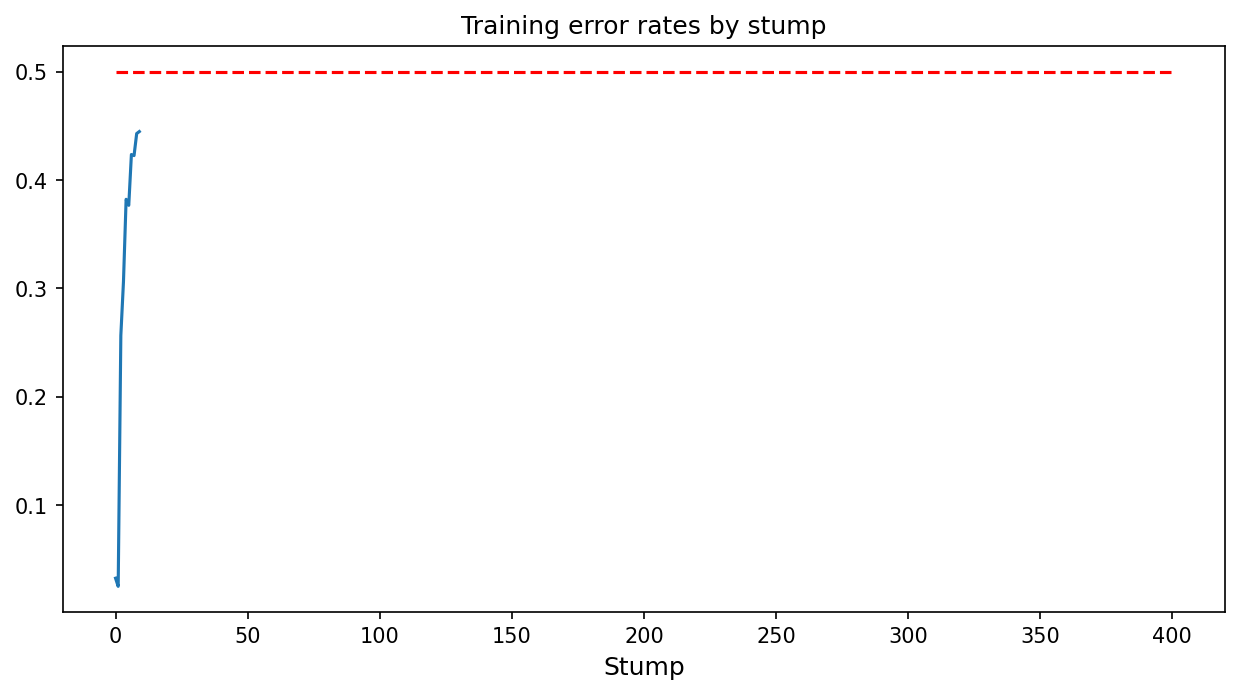

In [99]:
plt.figure(figsize=(10,5))
#plt.plot(M_dep, ab.training_errors)
#plt.plot(ab.M_dep, ab.training_errors)
plt.plot(ab.training_errors)
plt.hlines(0.5, 0, 400, colors = 'red', linestyles='dashed')
plt.title('Training error rates by stump')
plt.xlabel('Stump')
plt.show()

3. Modifique a função desenvolvida no item anterior para permitir a classificação de um problema no qual a variável resposta possa assumir 3 valores distintos.

In [100]:
# ESTE CÓDIGO FOI RETIRADO DE: https://github.com/jinxin0924/multi-adaboost/blob/master/multi_AdaBoost.py

# Para permitir a classificação de um problema em que a variável resposta pode assumir mais de 3 valores, vamos
# implementar um multi adaboost

from numpy.core.umath_tests import inner1d
from copy import deepcopy


class AdaBoostClassifier(object):
    '''
    Parameters
    -----------
    base_estimator: object
        The base model from which the boosted ensemble is built.
    n_estimators: integer, optional(default=50)
        The maximum number of estimators
    learning_rate: float, optional(default=1)
    algorithm: {'SAMME','SAMME.R'}, optional(default='SAMME.R')
        SAMME.R uses predicted probabilities to update wights, while SAMME uses class error rate
    random_state: int or None, optional(default=None)
    Attributes
    -------------
    estimators_: list of base estimators
    estimator_weights_: array of floats
        Weights for each base_estimator
    estimator_errors_: array of floats
        Classification error for each estimator in the boosted ensemble.
    Reference:
    1. [multi-adaboost](https://web.stanford.edu/~hastie/Papers/samme.pdf)
    2. [scikit-learn:weight_boosting](https://github.com/scikit-learn/
    scikit-learn/blob/51a765a/sklearn/ensemble/weight_boosting.py#L289)
    '''

    def __init__(self, *args, **kwargs):
        if kwargs and args:
            raise ValueError(
                '''AdaBoostClassifier can only be called with keyword
                   arguments for the following keywords: base_estimator ,n_estimators,
                    learning_rate,algorithm,random_state''')
        allowed_keys = ['base_estimator', 'n_estimators', 'learning_rate', 'algorithm', 'random_state']
        keywords_used = kwargs.keys()
        for keyword in keywords_used:
            if keyword not in allowed_keys:
                raise ValueError(keyword + ":  Wrong keyword used --- check spelling")

        n_estimators = 50
        learning_rate = 1
        algorithm = 'SAMME.R'
        random_state = None

        if kwargs and not args:
            if 'base_estimator' in kwargs:
                base_estimator = kwargs.pop('base_estimator')
            else:
                raise ValueError('''base_estimator can not be None''')
            if 'n_estimators' in kwargs: n_estimators = kwargs.pop('n_estimators')
            if 'learning_rate' in kwargs: learning_rate = kwargs.pop('learning_rate')
            if 'algorithm' in kwargs: algorithm = kwargs.pop('algorithm')
            if 'random_state' in kwargs: random_state = kwargs.pop('random_state')

        self.base_estimator_ = base_estimator
        self.n_estimators_ = n_estimators
        self.learning_rate_ = learning_rate
        self.algorithm_ = algorithm
        self.random_state_ = random_state
        self.estimators_ = list()
        self.estimator_weights_ = np.zeros(self.n_estimators_)
        self.estimator_errors_ = np.ones(self.n_estimators_)


    def _samme_proba(self, estimator, n_classes, X):
        """Calculate algorithm 4, step 2, equation c) of Zhu et al [1].
        References
        ----------
        .. [1] J. Zhu, H. Zou, S. Rosset, T. Hastie, "Multi-class AdaBoost", 2009.
        """
        proba = estimator.predict_proba(X)

        # Displace zero probabilities so the log is defined.
        # Also fix negative elements which may occur with
        # negative sample weights.
        proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
        log_proba = np.log(proba)

        return (n_classes - 1) * (log_proba - (1. / n_classes)
                                  * log_proba.sum(axis=1)[:, np.newaxis])


    def fit(self, X, y):
        self.n_samples = X.shape[0]
        # There is hidden trouble for classes, here the classes will be sorted.
        # So in boost we have to ensure that the predict results have the same classes sort
        self.classes_ = np.array(sorted(list(set(y))))
        self.n_classes_ = len(self.classes_)
        for iboost in range(self.n_estimators_):
            if iboost == 0:
                sample_weight = np.ones(self.n_samples) / self.n_samples

            sample_weight, estimator_weight, estimator_error = self.boost(X, y, sample_weight)

            # early stop
            if estimator_error == None:
                break

            # append error and weight
            self.estimator_errors_[iboost] = estimator_error
            self.estimator_weights_[iboost] = estimator_weight

            if estimator_error <= 0:
                break

        return self


    def boost(self, X, y, sample_weight):
        if self.algorithm_ == 'SAMME':
            return self.discrete_boost(X, y, sample_weight)
        elif self.algorithm_ == 'SAMME.R':
            return self.real_boost(X, y, sample_weight)

    def real_boost(self, X, y, sample_weight):
        estimator = deepcopy(self.base_estimator_)
        if self.random_state_:
            estimator.set_params(random_state=1)

        estimator.fit(X, y, sample_weight=sample_weight)

        y_pred = estimator.predict(X)
        incorrect = y_pred != y
        estimator_error = np.dot(incorrect, sample_weight) / np.sum(sample_weight, axis=0)

        # if worse than random guess, stop boosting
        if estimator_error >= 1.0 - 1 / self.n_classes_:
            return None, None, None

        y_predict_proba = estimator.predict_proba(X)
        # repalce zero
        y_predict_proba[y_predict_proba < np.finfo(y_predict_proba.dtype).eps] = np.finfo(y_predict_proba.dtype).eps

        y_codes = np.array([-1. / (self.n_classes_ - 1), 1.])
        y_coding = y_codes.take(self.classes_ == y[:, np.newaxis])

        # for sample weight update
        intermediate_variable = (-1. * self.learning_rate_ * (((self.n_classes_ - 1) / self.n_classes_) *
                                                              inner1d(y_coding, np.log(
                                                                  y_predict_proba))))  #dot iterate for each row

        # update sample weight
        sample_weight *= np.exp(intermediate_variable)

        sample_weight_sum = np.sum(sample_weight, axis=0)
        if sample_weight_sum <= 0:
            return None, None, None

        # normalize sample weight
        sample_weight /= sample_weight_sum

        # append the estimator
        self.estimators_.append(estimator)

        return sample_weight, 1, estimator_error


    def discrete_boost(self, X, y, sample_weight):
        estimator = deepcopy(self.base_estimator_)
        if self.random_state_:
            estimator.set_params(random_state=1)

        estimator.fit(X, y, sample_weight=sample_weight)

        y_pred = estimator.predict(X)
        incorrect = y_pred != y
        estimator_error = np.dot(incorrect, sample_weight) / np.sum(sample_weight, axis=0)

        # if worse than random guess, stop boosting
        if estimator_error >= 1 - 1 / self.n_classes_:
            return None, None, None

        # update estimator_weight
        estimator_weight = self.learning_rate_ * np.log((1 - estimator_error) / estimator_error) + np.log(
            self.n_classes_ - 1)

        if estimator_weight <= 0:
            return None, None, None

        # update sample weight
        sample_weight *= np.exp(estimator_weight * incorrect)

        sample_weight_sum = np.sum(sample_weight, axis=0)
        if sample_weight_sum <= 0:
            return None, None, None

        # normalize sample weight
        sample_weight /= sample_weight_sum

        # append the estimator
        self.estimators_.append(estimator)

        return sample_weight, estimator_weight, estimator_error

    def predict(self, X):
        n_classes = self.n_classes_
        classes = self.classes_[:, np.newaxis]
        pred = None

        if self.algorithm_ == 'SAMME.R':
            # The weights are all 1. for SAMME.R
            pred = sum(self._samme_proba(estimator, n_classes, X) for estimator in self.estimators_)
        else:  # self.algorithm == "SAMME"
            pred = sum((estimator.predict(X) == classes).T * w
                       for estimator, w in zip(self.estimators_,
                                               self.estimator_weights_))

        pred /= self.estimator_weights_.sum()
        if n_classes == 2:
            pred[:, 0] *= -1
            pred = pred.sum(axis=1)
            return self.classes_.take(pred > 0, axis=0)

        return self.classes_.take(np.argmax(pred, axis=1), axis=0)


    def predict_proba(self, X):
        if self.algorithm_ == 'SAMME.R':
            # The weights are all 1. for SAMME.R
            proba = sum(self._samme_proba(estimator, self.n_classes_, X)
                        for estimator in self.estimators_)
        else:  # self.algorithm == "SAMME"
            proba = sum(estimator.predict_proba(X) * w
                        for estimator, w in zip(self.estimators_,
                                                self.estimator_weights_))

        proba /= self.estimator_weights_.sum()
        proba = np.exp((1. / (n_classes - 1)) * proba)
        normalizer = proba.sum(axis=1)[:, np.newaxis]
        normalizer[normalizer == 0.0] = 1.0
        proba /= normalizer

        return proba

4. Modifique a função desenvolvida no item (a) para que o seu estimador possa resolver um problema de regressão, modelando variáveis que possam assumir valores reais.

In [101]:
# ESTE CÓDIGO USA COMO REFERÊNCIA: https://towardsdatascience.com/adaboost-from-scratch-37a936da3d50

# MODIFICANDO PARA DECISION TREE REGRESSOR  

class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.M = None
        self.training_errors = []
        self.prediction_errors = []
        self.M_dep = []

    def fit(self, X, y, M_dep = 1, M = 100):

        self.alphas = [] 
        self.training_errors = []
        self.M = M

        for m in range(0, M):
            
            if m == 0:
                w_i = np.ones(len(y)) * 1 / len(y)  
            else:
                w_i = update_weights(w_i, alpha_m, y, y_pred)
            
# change here for REGRESSOR
            G_m = DecisionTreeRegressor(max_depth = D)     
            G_m.fit(X, y, sample_weight = w_i)
            y_pred = G_m.predict(X)
            
            self.G_M.append(G_m) 

            error_m = compute_error(y, y_pred, w_i)
            self.training_errors.append(error_m)

            alpha_m = compute_alpha(error_m)
            self.alphas.append(alpha_m)

        assert len(self.G_M) == len(self.alphas)

    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred      

## Exercício 2

Acesse o seguinte dataset do kaggle: <www.kaggle.com/datasets/lucidlenn/sloan-digital-sky-survey?datasetId=15652&sortBy=voteCount>. 

Os dados disponíveis contém informações obtidas Sloan Digital Sky Survey para galáxias, estrelas e quasars. Seu objetivo será conseguir classificar os corpos celestes, conforme indicado pela variável "class", a partir do conjunto de features disponíveis. O dataset em questão é "bem comportado", não apresentando valores faltantes. Assim o seu desafio será concentrado em duas etapas. 

Primeiramente, você deverá selecionar o conjunto de informações relevantes para aprendizado dos modelos a partir da documentação disponível e da exploração da base. 

Na sequência, concentre-se na otimização de hiperparâmetros de modelos concorrentes, de forma a gerar as previsões mais acuradas possíveis. Não deixe de apresentar e discutir as matrizes de confusão no conjunto de testes.

Finalmente, tente "abrir a caixa preta" do melhor modelo baseado em árvore (Random Forest ou Boosting) desenvolvido. Para isso, não deixe de gerar e interpretar os resultados de um gráfico de Feature Importance baseado em Feature Permutation. Se desejar ir além (bônus) utilize implementações como o ELI5 (Explain Like I’m 5, <https://eli5.readthedocs.io/en/latest/>) ou Shap (SHapley Additive ex-Planations, <https://shap.readthedocs.io/en/latest/index.html> ).

In [102]:
df_sky = pd.read_csv("/Users/fernandagarcia/Documents/FGV RI 2022.1/Machine Learning/sky.csv")
#df_sky = pd.read_csv("C:/Users/jrogatoduo/Downloads/Machine Learning/sky.csv")

#from google.colab import files
#uploaded = files.upload()
#df_sky = pd.read_csv(io.BytesIO(uploaded['sky.csv']))

In [103]:
df_sky.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [104]:
df_sky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [105]:
# Como vimos que nossa variável de interesse é objeto, vamos rodar um unique para ver como 
# está preenchida para que possamos fazer o encoding correto

df_sky['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [106]:
# Aqui, temos que renomear nossa variável dependente porque o python tem uma função 'class'

df_sky.rename(columns = {'class': 'outcome'}, inplace = True)

In [107]:
# Antes do encoding, vamos plotar a distribuição da nossa variável dependente na base 

# O gráfico é iterativo, ao passar o mouse é possível ver a quantidade de observações de cada classe

cnt_srs = df_sky['outcome'].value_counts()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=cnt_srs.values[::-1],
        colorscale = 'rainbow',
        reversescale = True
    ),
)

layout = dict(
    title='Class distribution',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Ratings")

In [108]:
# Encoding da variável Outcome

df_sky.outcome = df_sky.replace(
    {"outcome": {"QSO": 0, 
             "STAR": 1,
              "GALAXY": 2}}                
                  ).outcome  


In [109]:
df_sky.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,outcome,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,1,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,1,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,2,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,1,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,1,0.000590,3306,54922,512


In [110]:
# Verificando as variáveis independentes 

df_sky.columns.values

array(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun',
       'camcol', 'field', 'specobjid', 'outcome', 'redshift', 'plate',
       'mjd', 'fiberid'], dtype=object)

In [111]:
# Following the link https://www.kaggle.com/code/lucidlenn/data-analysis-and-classification-using-xgboost

# Some os these colunms tell us little to nothing on the outcome. 

# "objid and specobjid are just identifiers for accessing the rows back when 
# they were stored in the original databank. Therefore we will not need them 
# for classification as they are not related to the outcome. Even more: 
# The features 'run', 'rerun', 'camcol' and 'field' are values which describe 
# parts of the camera at the moment when making the observation, e.g. 'run' 
# represents the corresponding scan which captured the oject."

# ESTE CÓDIGO USA COMO REFERÊNCIA: https://www.kaggle.com/code/lucidlenn/data-analysis-and-classification-using-xgboost

df_sky.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid'], axis=1, inplace=True)

In [112]:
df_sky.head()

,ra,dec,u,g,r,i,z,outcome,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,1,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,1,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,2,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,1,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,1,0.000590,3306,54922,512


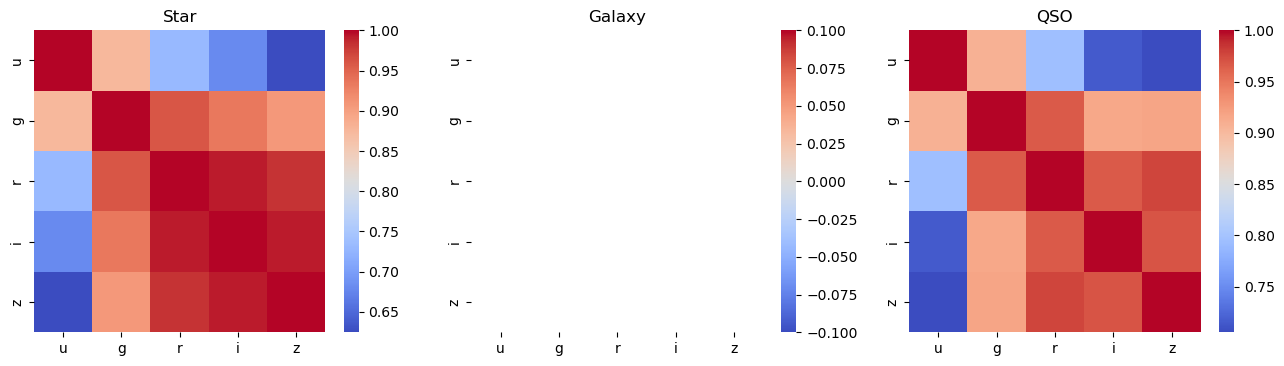

In [113]:
# FROM: https://www.kaggle.com/code/lucidlenn/data-analysis-and-classification-using-xgboost

# Multivariate Analysis

# u,g,r,i,z filters
# Recall: u, g, r, i, z represent the different wavelengths which are used to capture the observations.

# Let's find out how much they are correlated.


fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(df_sky[df_sky['outcome']== 2][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Star')
ax = sns.heatmap(df_sky[df_sky['outcome']== 3][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Galaxy')
ax = sns.heatmap(df_sky[df_sky['outcome']== 1][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[2], cmap='coolwarm')
ax = ax.set_title('QSO')

In [114]:
corr = df_sky.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

# interessante que apesar de u estar altamente correlacionada com g 
# ela ainda 

# i, z, redshift, mjd

,ra,dec,u,g,r,i,z,outcome,redshift,plate,mjd,fiberid
ra,1.00,0.00,0.03,0.04,0.05,0.05,0.04,0.02,0.03,-0.10,-0.09,0.06
dec,0.00,1.00,0.04,0.06,0.06,0.06,0.06,-0.00,0.07,0.09,0.07,0.16
u,0.03,0.04,1.00,0.85,0.69,0.60,0.55,0.12,0.16,-0.13,-0.17,0.01
g,0.04,0.06,0.85,1.00,0.96,0.91,0.88,-0.20,0.41,-0.05,-0.09,0.05
r,0.05,0.06,0.69,0.96,1.00,0.98,0.97,-0.34,0.44,0.02,-0.01,0.06
i,0.05,0.06,0.60,0.91,0.98,1.00,0.98,-0.42,0.43,0.07,0.05,0.07
z,0.04,0.06,0.55,0.88,0.97,0.98,1.00,-0.47,0.42,0.11,0.10,0.07
outcome,0.02,-0.00,0.12,-0.20,-0.34,-0.42,-0.47,1.00,-0.49,-0.41,-0.45,-0.07
redshift,0.03,0.07,0.16,0.41,0.44,0.43,0.42,-0.49,1.00,-0.04,-0.06,0.05
plate,-0.10,0.09,-0.13,-0.05,0.02,0.07,0.11,-0.41,-0.04,1.00,0.97,0.23


In [115]:
df_sky_2 = df_sky

# encode class labels to integers

# Principal Component Analysis
pca = PCA(n_components=3)
ugriz = pca.fit_transform(df_sky_2[['u', 'g', 'r', 'i', 'z']])

# update dataframe 
df_sky_2 = pd.concat((df_sky_2, pd.DataFrame(ugriz)), axis=1)
df_sky_2.rename({0: 'PCA_1', 1: 'PCA_2', 2: 'PCA_3'}, axis=1, inplace = True)
df_sky_2.drop(['u', 'g', 'r', 'i', 'z'], axis=1, inplace=True)
df_sky_2.head()

,ra,dec,outcome,redshift,plate,mjd,fiberid,PCA_1,PCA_2,PCA_3
0,183.531326,0.089693,1,-0.000009,3306,54922,491,-1.507202,-1.377293,-0.265119
1,183.598370,0.135285,1,-0.000055,323,51615,541,-0.195758,-0.028410,-0.155695
2,183.680207,0.126185,2,0.123111,287,52023,513,1.297604,-0.590023,0.140338
3,183.870529,0.049911,1,-0.000111,3306,54922,510,-1.446117,0.566685,-0.009272
4,183.883288,0.102557,1,0.000590,3306,54922,512,-0.849271,1.287505,-0.397689


In [116]:
corr = df_sky_2.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,ra,dec,outcome,redshift,plate,mjd,fiberid,PCA_1,PCA_2,PCA_3
ra,1.00,0.00,0.02,0.03,-0.10,-0.09,0.06,0.05,0.00,0.01
dec,0.00,1.00,-0.00,0.07,0.09,0.07,0.16,0.06,0.01,0.05
outcome,0.02,-0.00,1.00,-0.49,-0.41,-0.45,-0.07,-0.34,-0.55,0.09
redshift,0.03,0.07,-0.49,1.00,-0.04,-0.06,0.05,0.42,0.16,0.34
plate,-0.10,0.09,-0.41,-0.04,1.00,0.97,0.23,0.03,0.26,-0.29
mjd,-0.09,0.07,-0.45,-0.06,0.97,1.00,0.19,0.01,0.29,-0.33
fiberid,0.06,0.16,-0.07,0.05,0.23,0.19,1.00,0.06,0.05,-0.00
PCA_1,0.05,0.06,-0.34,0.42,0.03,0.01,0.06,1.00,-0.00,0.00
PCA_2,0.00,0.01,-0.55,0.16,0.26,0.29,0.05,-0.00,1.00,-0.00
PCA_3,0.01,0.05,0.09,0.34,-0.29,-0.33,-0.00,0.00,-0.00,1.00


In [117]:
scaler = MinMaxScaler()
sky = scaler.fit_transform(df_sky_2.drop('outcome', axis=1))

In [118]:
X_train, X_test, y_train, y_test = train_test_split(sky, df_sky_2['outcome'], test_size=0.3)

## Modelos 

### K Nearest Neighbors Classifier

In [119]:
knn = KNeighborsClassifier()
training_start = time.perf_counter()
model = knn.fit(X_train, y_train)
y_pred_knn = model.predict(X_test) # para rodar a matrix de confusão
cm_knn = confusion_matrix(y_test, y_pred_knn) # para rodar a matrix de confusão
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))


Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 92.67
Time consumed for training: 0.144 seconds
Time consumed for prediction: 0.12591 seconds


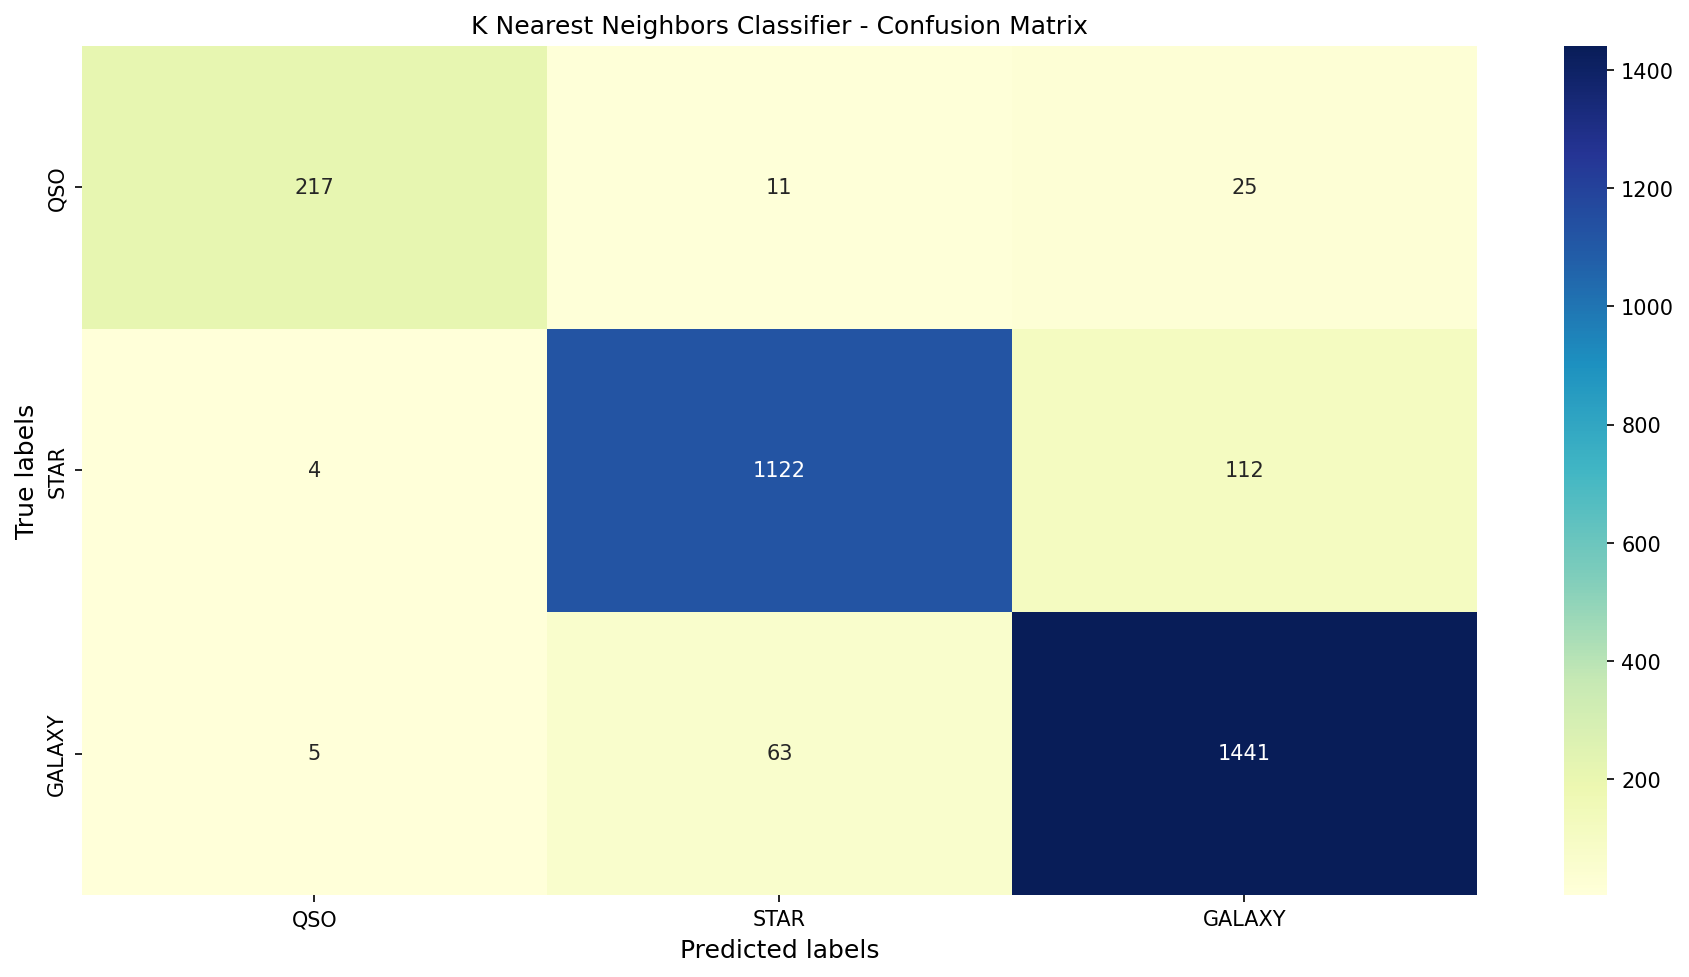

In [120]:
# Vamos add ao código de referência as matrizes confusão para facilitar a visualização

labels = ["QSO", "STAR", "GALAXY"]

ax= plt.subplot()
sns.heatmap(cm_knn, annot=True, fmt='g', ax=ax, cmap="YlGnBu"); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('K Nearest Neighbors Classifier - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

### Gaussian Naive Bayes Classifier

In [121]:
scaler_gnb = MaxAbsScaler()
sky = scaler_gnb.fit_transform(df_sky_2.drop('outcome', axis=1))
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(sky, df_sky_2['outcome'], test_size=0.3)


gnb = GaussianNB()
training_start = time.perf_counter()
model = gnb.fit(X_train_gnb, y_train_gnb)
y_pred_gnb = model.predict(X_test_gnb) # para rodar a matrix de confusão
cm_gnb = confusion_matrix(y_test_gnb, y_pred_gnb) # para rodar a matrix de confusão
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gnb.predict(X_test_gnb)
prediction_end = time.perf_counter()
acc_gnb = (preds == y_test_gnb).sum().astype(float) / len(preds)*100
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))

Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 96.97
Time consumed for training: 0.006 seconds
Time consumed for prediction: 0.00083 seconds


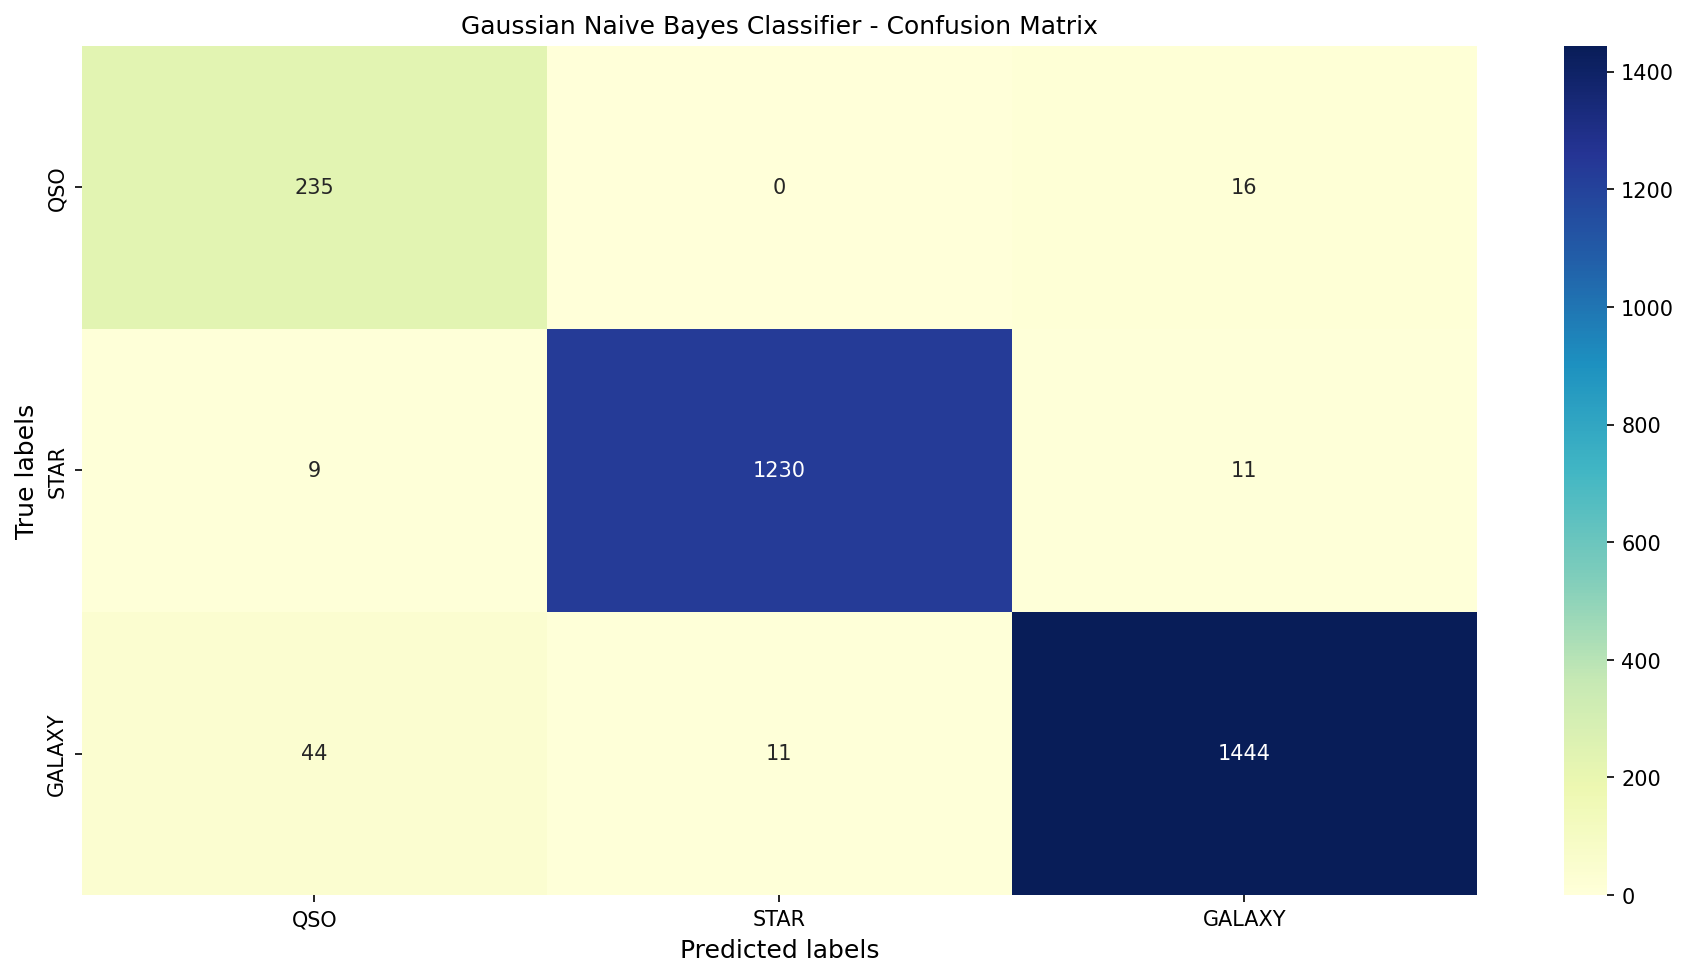

In [122]:
# Vamos add ao código de referência as matrizes confusão para facilitar a visualização

labels = ["QSO", "STAR", "GALAXY"]

ax= plt.subplot()
sns.heatmap(cm_gnb, annot=True, fmt='g', ax=ax, cmap="YlGnBu"); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Gaussian Naive Bayes Classifier - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

### XGBoost

In [123]:

xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
model = xgb.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test) # para rodar a matrix de confusão
cm_xgb = confusion_matrix(y_test, y_pred_xgb) # para rodar a matrix de confusão
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 99.43
Time consumed for training: 1.012
Time consumed for prediction: 0.00580 seconds


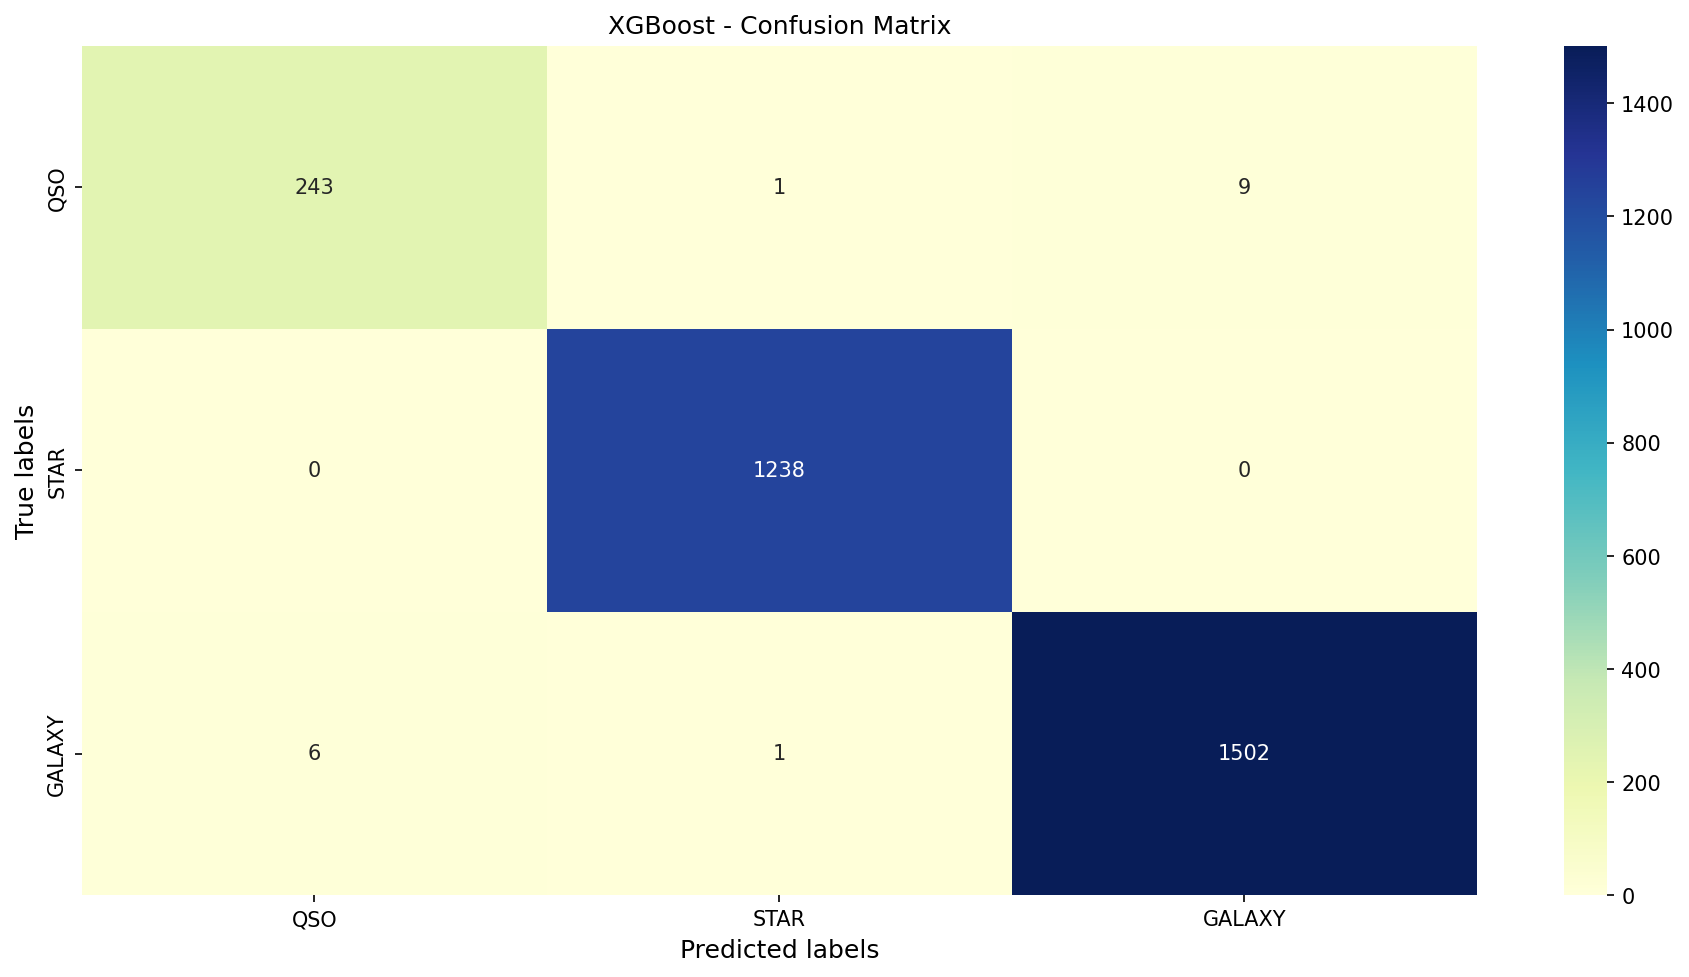

In [124]:
# Vamos add ao código de referência as matrizes confusão para facilitar a visualização

labels = ["QSO", "STAR", "GALAXY"]

ax= plt.subplot()
sns.heatmap(cm_xgb, annot=True, fmt='g', ax=ax, cmap="YlGnBu"); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('XGBoost - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

### Decision Tree

In [125]:
# Vamos complementar a análise feita no código de referência adicionando o 
# modelo de árvore de decisão 

dtc = sk_tree.DecisionTreeClassifier(max_depth = 2) 
dtc_noprune = sk_tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_noprune.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print("Accuracy", metrics.accuracy_score(y_test, y_pred_dtc))
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = dtc.predict(X_test)
prediction_end = time.perf_counter()
acc_dtc = (preds == y_test).sum().astype(float) / len(preds)*100
dtc_train_time = training_end-training_start
dtc_prediction_time = prediction_end-prediction_start
print("Decision Tree's prediction accuracy is: %3.2f" % (acc_dtc))
print("Time consumed for training: %4.3f" % (dtc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (dtc_prediction_time))

Accuracy 0.988
Decision Tree's prediction accuracy is: 98.80
Time consumed for training: 1.452
Time consumed for prediction: 0.00084 seconds


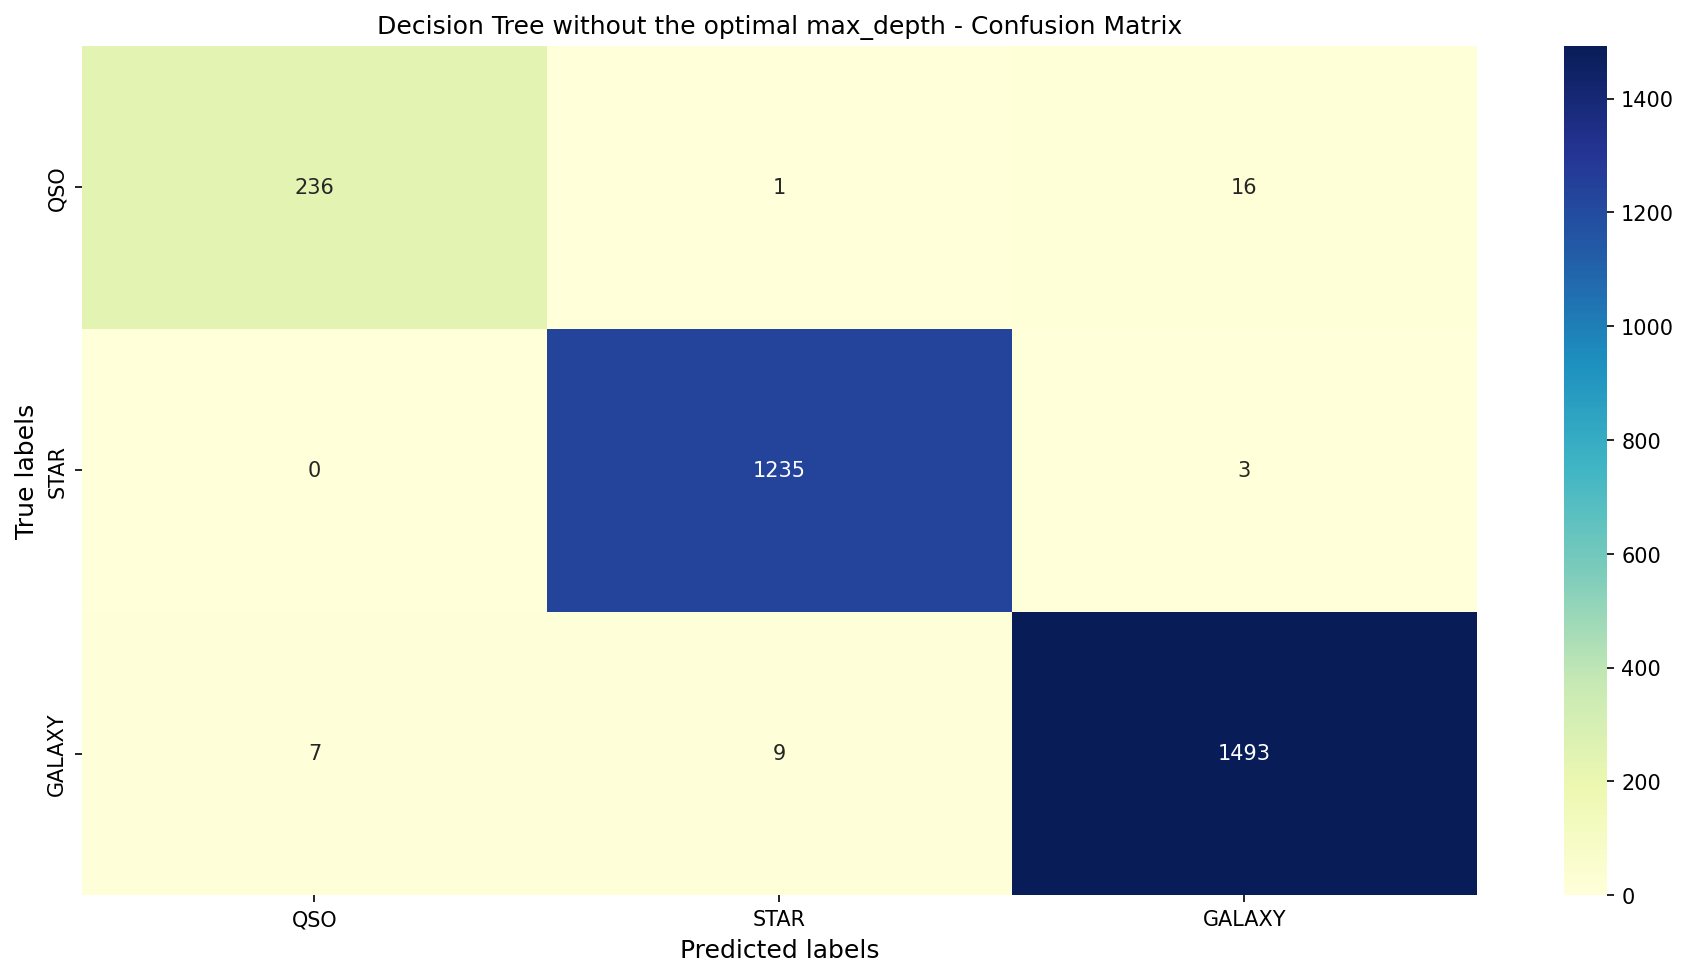

In [126]:
labels = ["QSO", "STAR", "GALAXY"]

ax= plt.subplot()
sns.heatmap(cm_dtc, annot=True, fmt='g', ax=ax, cmap="YlGnBu"); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Decision Tree without the optimal max_depth - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [127]:
# To optimize the hyperparameters 

# We got insights from: 
# 1. https://www.projectpro.io/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python
# 2. https://www.analyticsvidhya.com/blog/2020/11/hyperparameter-tuning-using-optuna/ 


In [128]:
# From link 1:

std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

n_components = list(range(1,X_train.shape[1]+1,1))

criterion = ['gini','entropy']
max_depth= [2,4,6,8,10,12]

parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)

print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 8
Best Number Of Components: 8

DecisionTreeClassifier(criterion='entropy', max_depth=8)


In [129]:
dtc = sk_tree.DecisionTreeClassifier(max_depth = 10) # after we tested for the hyperparameters 
dtc_noprune = sk_tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_noprune.fit(X_train, y_train)
#dot_data = sk_tree.export_graphviz(dtc, out_file=None, 
#                     class_names = ['QSO', 'Star', 'Galaxy'],
#                     filled=True, rounded=True) 
#graph = graphviz.Source(dot_data) 
#graph
y_pred_dtc = dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print("Accuracy", metrics.accuracy_score(y_test, y_pred_dtc))
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = dtc.predict(X_test)
prediction_end = time.perf_counter()
acc_dtc = (preds == y_test).sum().astype(float) / len(preds)*100
dtc_train_time = training_end-training_start
dtc_prediction_time = prediction_end-prediction_start
print("Decision Tree's prediction accuracy is: %3.2f" % (acc_dtc))
print("Time consumed for training: %4.3f" % (dtc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (dtc_prediction_time))

Accuracy 0.9883333333333333
Decision Tree's prediction accuracy is: 98.83
Time consumed for training: 35.743
Time consumed for prediction: 0.00079 seconds


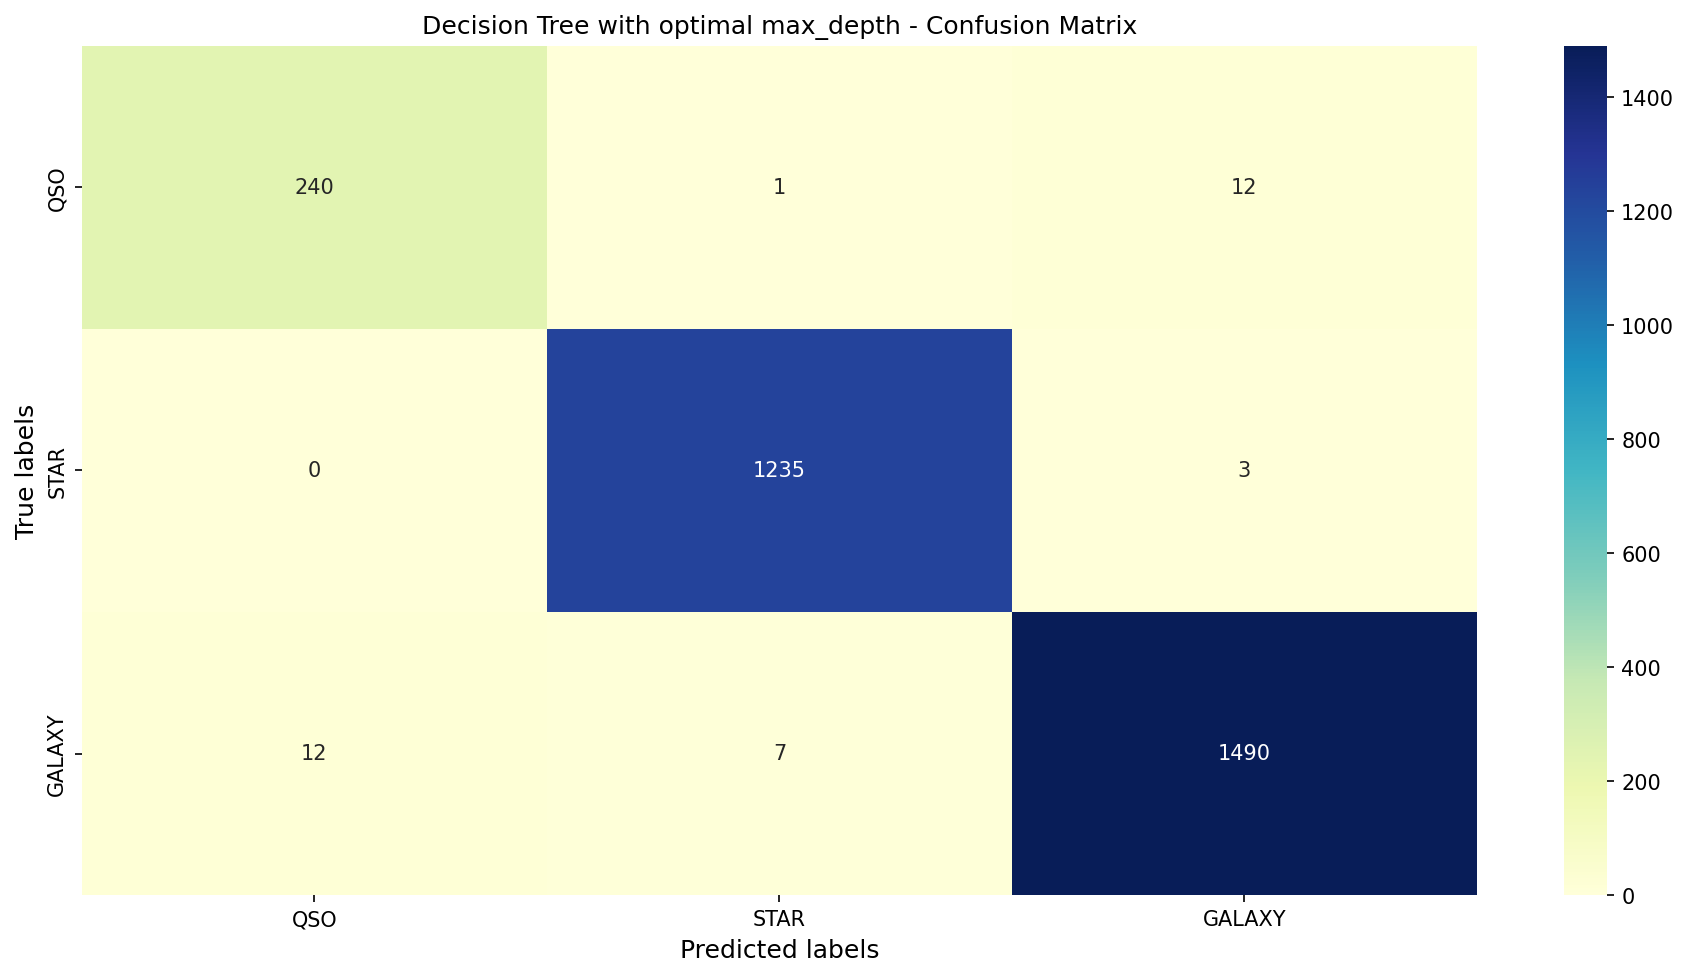

In [130]:
labels = ["QSO", "STAR", "GALAXY"]

ax= plt.subplot()
sns.heatmap(cm_dtc, annot=True, fmt='g', ax=ax, cmap="YlGnBu"); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Decision Tree with optimal max_depth - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

### Random Forest Classifier

In [131]:

rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
model = rfc.fit(X_train, y_train)
y_pred_rfc = model.predict(X_test)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))


Scikit-Learn's Random Forest Classifier's prediction accuracy is: 99.00
Time consumed for training: 0.137 seconds
Time consumed for prediction: 0.00375 seconds


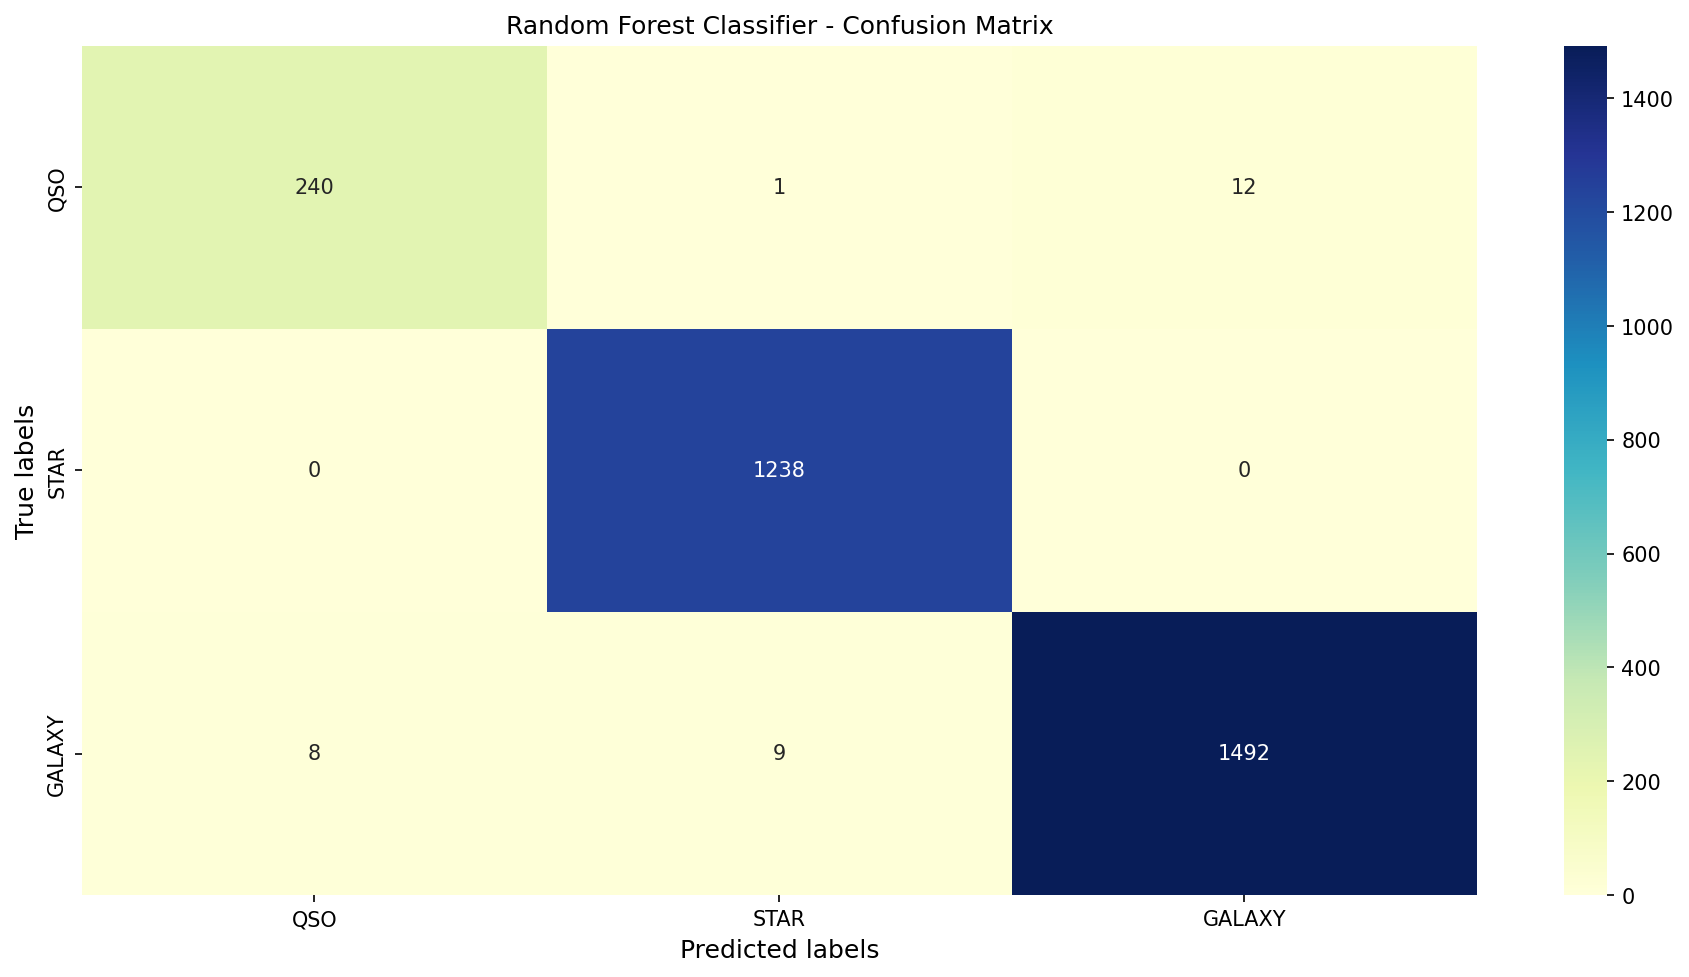

In [132]:
labels = ["QSO", "STAR", "GALAXY"]

ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, fmt='g', ax=ax, cmap="YlGnBu"); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Random Forest Classifier - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

### Support Vector Machine Classifier

In [133]:


svc = SVC()
training_start = time.perf_counter()
model = svc.fit(X_train, y_train)
y_pred_svs = model.predict(X_test)
cm_svs = confusion_matrix(y_test, y_pred_svs)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = svc.predict(X_test)
prediction_end = time.perf_counter()
acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100
svc_train_time = training_end-training_start
svc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))
print("Time consumed for training: %4.3f seconds" % (svc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (svc_prediction_time))


Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 94.43
Time consumed for training: 2.012 seconds
Time consumed for prediction: 0.76400 seconds


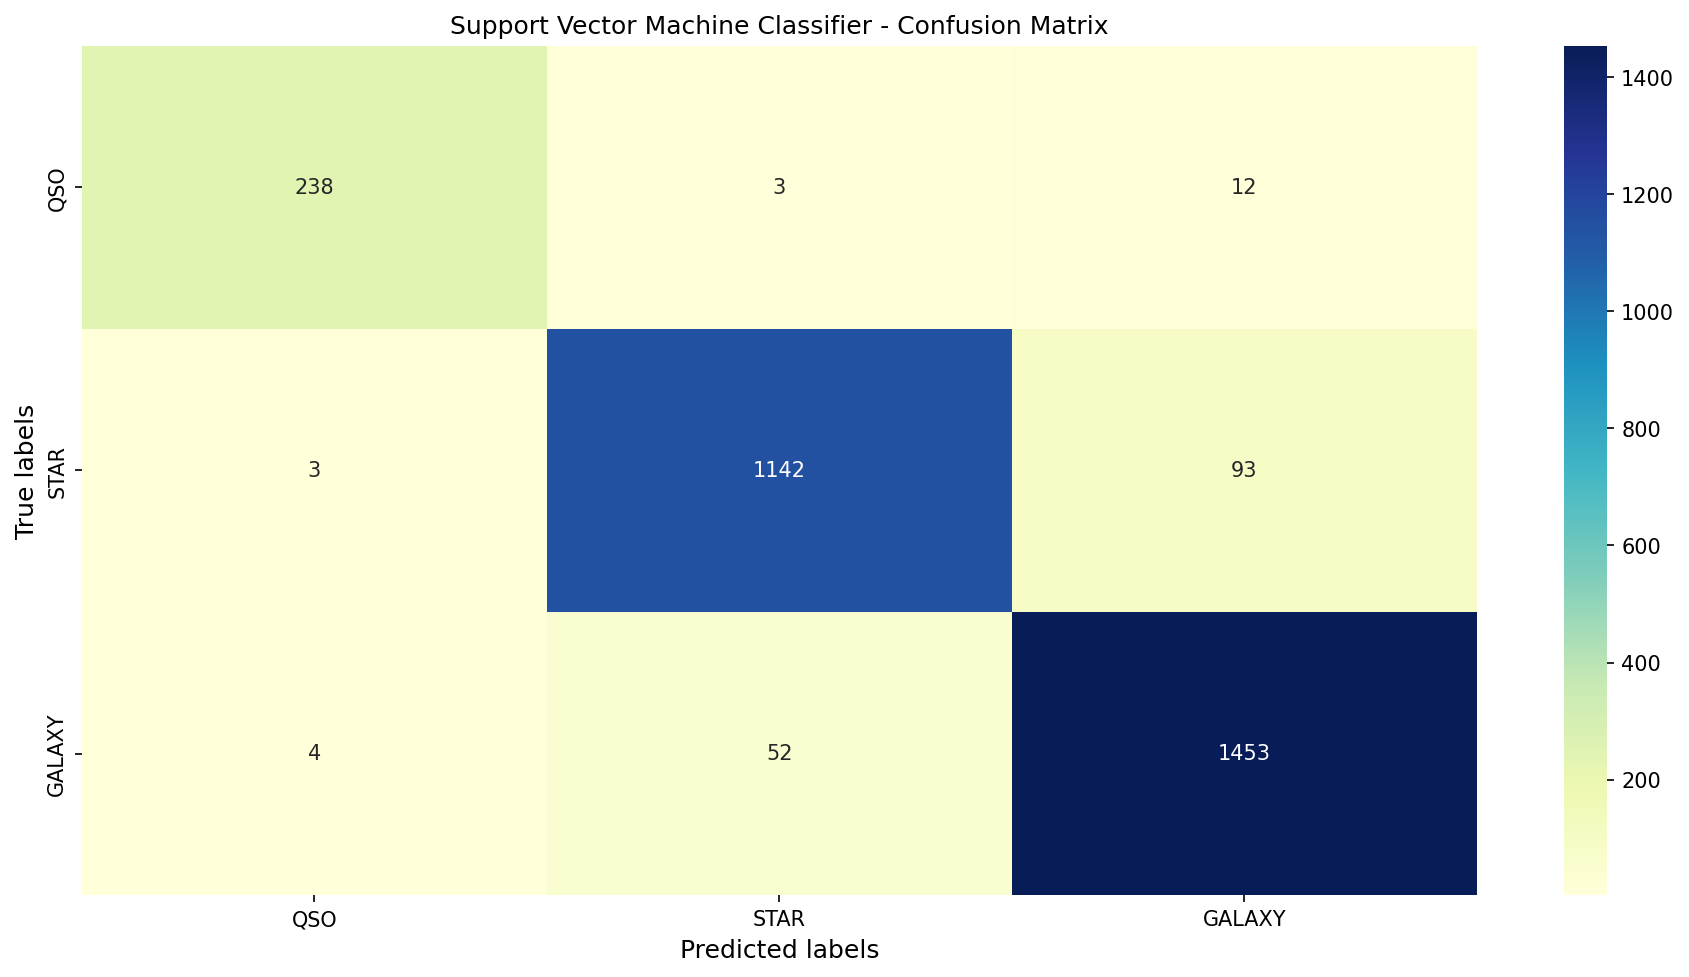

In [134]:
labels = ["QSO", "STAR", "GALAXY"]

ax= plt.subplot()
sns.heatmap(cm_svs, annot=True, fmt='g', ax=ax, cmap="YlGnBu"); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Support Vector Machine Classifier - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

### AdaBoostClassifier

In [137]:
# Vamos complementar a análise feita no código de referência adicionando o 
# modelo de árvore de decisão 


# From:https://www.datacamp.com/tutorial/adaboost-classifier-python

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_adb = model.predict(X_test)

# Computing model accuracy
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred_adb))

training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = abc.predict(X_test)
prediction_end = time.perf_counter()
acc_abc = (preds == y_test).sum().astype(float) / len(preds)*100
abc_train_time = training_end-training_start
abc_prediction_time = prediction_end-prediction_start
print("AdaBoostClassifier's prediction accuracy is: %3.2f" % (acc_abc))
print("Time consumed for training: %4.3f seconds" % (abc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (abc_prediction_time))


AdaBoostClassifier's prediction accuracy is: 94.87
Time consumed for training: 48.151 seconds
Time consumed for prediction: 0.02105 seconds


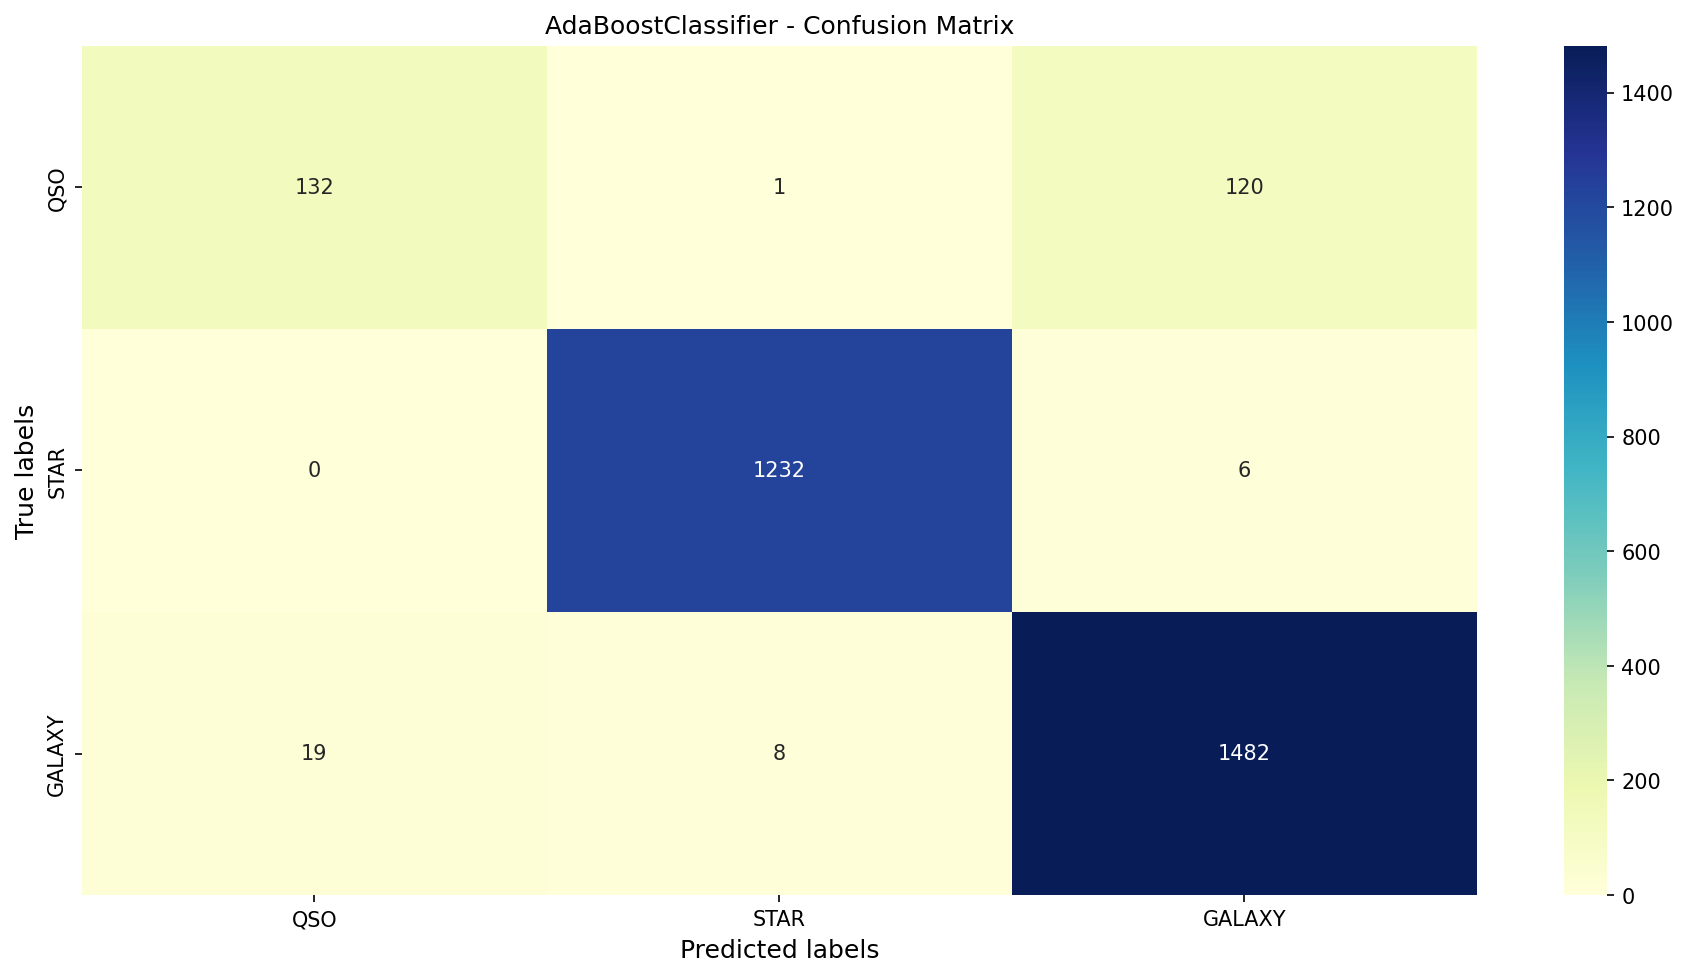

In [138]:
# Confusion Matrix
cm_abc = confusion_matrix(y_test, y_pred_adb)

labels = ["QSO", "STAR", "GALAXY"]

ax= plt.subplot()
sns.heatmap(cm_abc, annot=True, fmt='g', ax=ax, cmap="YlGnBu"); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('AdaBoostClassifier - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [139]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 'Decision Tree', 'AdaBoost',
              'XGBoost', 'Random Forest', 'SVC'],
    'Score': [acc_knn, acc_gnb, acc_dtc, acc_xgb, acc_abc, acc_rfc, acc_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, dtc_train_time, abc_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, dtc_prediction_time, abc_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]}) 
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df


,Score,Runtime Training,Runtime Prediction
Model,,,
AdaBoost,99.433333,48.151341,0.021055
Random Forest,99.000000,0.137355,0.003750
Decision Tree,98.833333,35.743074,0.000793
Naive Bayes,96.966667,0.006396,0.000829
XGBoost,94.866667,1.012130,0.005800
SVC,94.433333,2.012491,0.763998
KNN,92.666667,0.143816,0.125909


In [140]:

abc_cv = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(abc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.95142857 0.91142857 0.95714286 0.94142857 0.95142857 0.92571429
 0.95       0.94714286 0.95571429 0.94857143]
Mean: 0.9440000000000002
Standard Deviation: 0.0137440153952065


In [141]:

rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.99       0.99285714 0.99285714 0.99428571 0.99285714 0.99571429
 0.99       0.99       0.99       0.99285714]
Mean: 0.9921428571428571
Standard Deviation: 0.0019430672155336375


In [142]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.99142857 0.99142857 0.99571429 0.99571429 0.99285714 0.99571429
 0.99428571 0.99142857 0.99       0.99428571]
Mean: 0.9932857142857143
Standard Deviation: 0.002025349554108245


In [143]:

importances = pd.DataFrame({
    'Feature': df_sky_2.drop('outcome', axis=1).columns,
    'Importance': rfc.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
redshift,0.424095
mjd,0.185750
plate,0.130094
PCA_3,0.088673
PCA_1,0.088468
PCA_2,0.068344
ra,0.006449
dec,0.004972
fiberid,0.003154


<AxesSubplot:xlabel='Feature'>

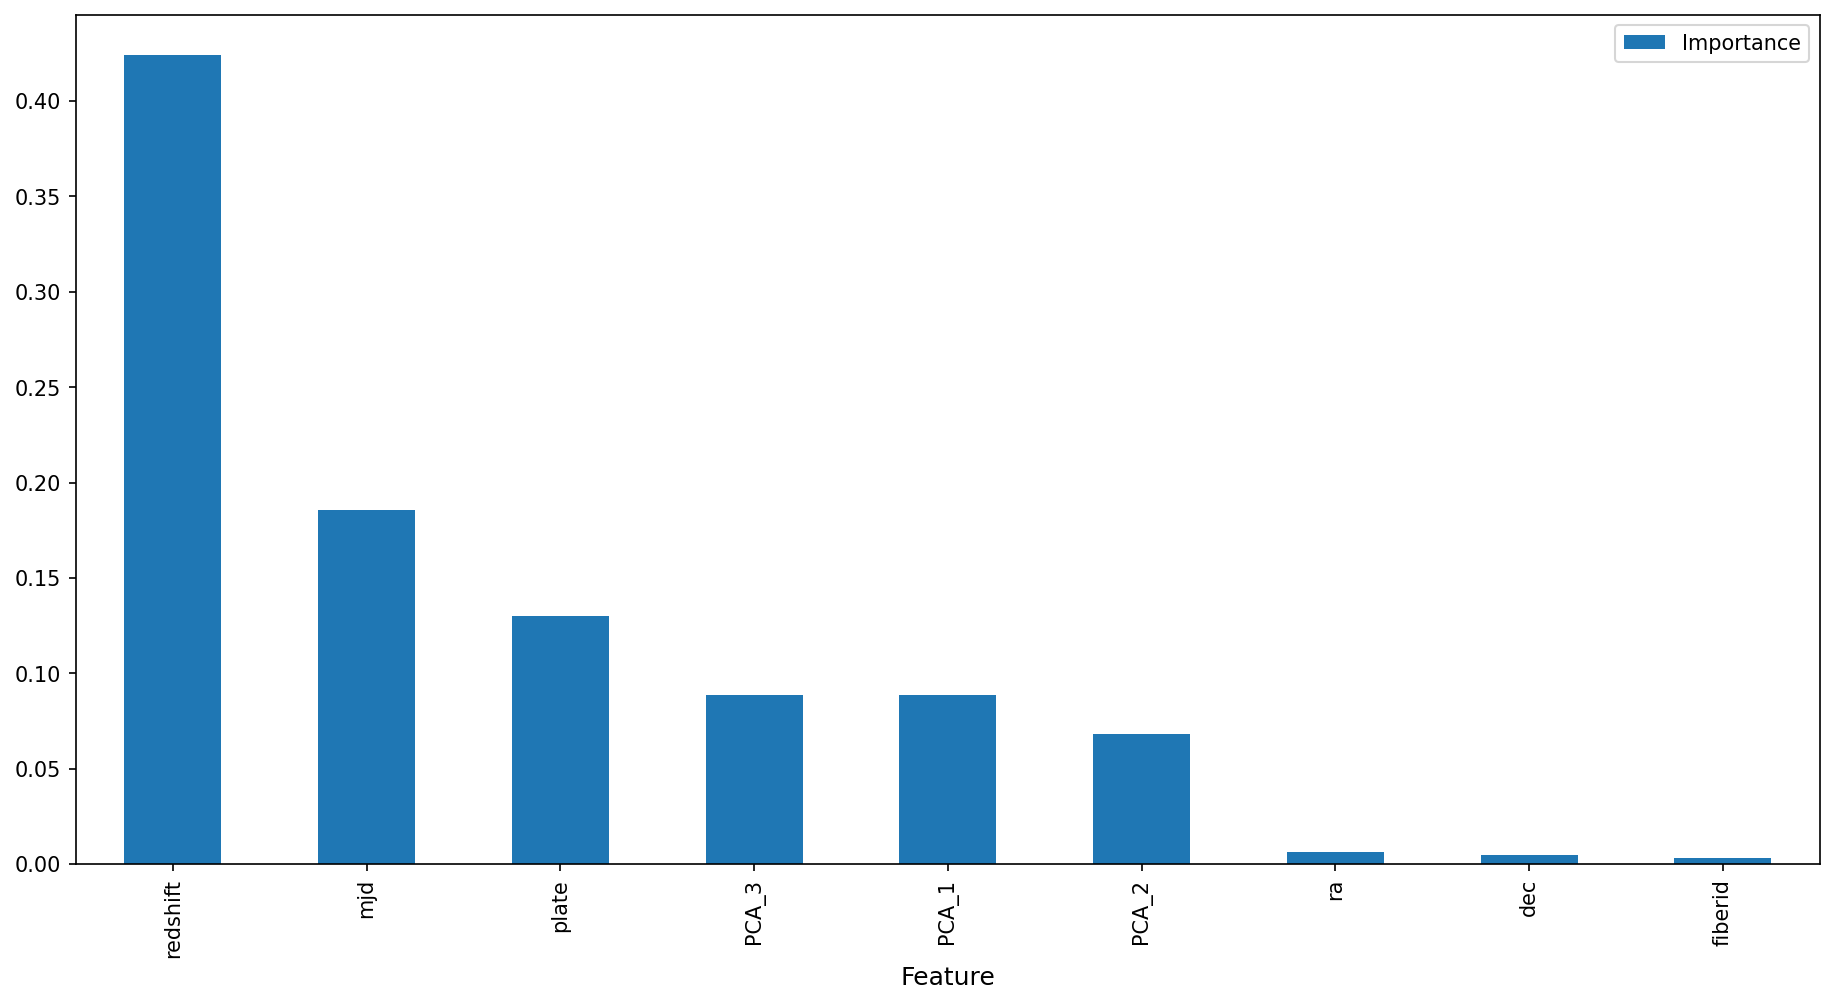

In [144]:
importances.plot.bar()

In [145]:
scaler = MinMaxScaler()
sky = pd.DataFrame(scaler.fit_transform(df_sky_2.drop(['mjd', 'outcome'], axis=1)), columns=df_sky_2.drop(['mjd', 'outcome'], axis=1).columns)
sky['outcome'] = df_sky_2['outcome']


In [146]:
sky.head()

,ra,dec,redshift,plate,fiberid,PCA_1,PCA_2,PCA_3,outcome
0,0.693832,0.074025,0.000770,0.373281,0.490490,0.385886,0.069348,0.387685,1
1,0.694098,0.074642,0.000762,0.006999,0.540541,0.448110,0.215264,0.415556,1
2,0.694422,0.074519,0.023749,0.002579,0.512513,0.518964,0.154511,0.490959,2
3,0.695175,0.073487,0.000751,0.373281,0.509510,0.388785,0.279638,0.452852,1
4,0.695225,0.074199,0.000882,0.373281,0.511512,0.417103,0.357613,0.353918,1


In [147]:
X_train, X_test, y_train, y_test = train_test_split(sky.drop('outcome', axis=1), sky['outcome'], test_size=0.33)

In [148]:
# Inicialmente, XGBoost era o melhor modelo...

#xgboost = XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0, 
#                       min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

#xgboost.fit(X_train, y_train)
#preds = xgboost.predict(X_test)

#accuracy = (preds == y_test).sum().astype(float) / len(preds)*100

#print("XGBoost's prediction accuracy WITH optimal hyperparameters is: %3.2f" % (accuracy))

In [149]:
# Queriamos rodar os códigos desse link (https://www.kaggle.com/code/juanmah/tactic-03-hyperparameter-optimization-adaboost)
# Infelizmente, não rodaram. Logo, usamos a referência:
# https://machinelearningmastery.com/adaboost-ensemble-in-python/#:~:text=An%20important%20hyperparameter%20for%20AdaBoost,but%20is%20not%20highly%20skillful.


# example of grid searching key hyperparameters for adaboost on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model with default hyperparameters
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.813667 using {'learning_rate': 0.1, 'n_estimators': 500}
0.646333 (0.036376) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.646667 (0.036545) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.646667 (0.036545) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.647000 (0.038136) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.646667 (0.036545) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.647000 (0.038136) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.654333 (0.045511) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.672667 (0.046543) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.648333 (0.042197) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.671667 (0.045613) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.715000 (0.053213) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.767667 (0.045948) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.716667 (0.048876) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.767000

In [150]:
unique, counts = np.unique(sky['outcome'], return_counts=True)
dict(zip(unique, counts))

{0: 850, 1: 4152, 2: 4998}

In [151]:
predictions = cross_val_predict(xgb, sky.drop('outcome', axis=1), sky['outcome'], cv=3)
confusion_matrix(sky['outcome'], predictions)

array([[ 824,    1,   25],
       [   0, 4146,    6],
       [  26,    8, 4964]])

In [152]:
print("Precision:", precision_score(sky['outcome'], predictions, average='micro'))
print("Recall:",recall_score(sky['outcome'], predictions, average='micro'))

Precision: 0.9934
Recall: 0.9934


In [153]:
print("F1-Score:", f1_score(sky['outcome'], predictions, average='micro'))

F1-Score: 0.9934


## Exercício 3 

O objetivo do exercício será trabalhar com visualização avançada de dados para caracterização de baixas da Rússia ao longo da invasão da Ucrânia, tanto em termos materiais (equipamentos) como de soldados mortos e presos. Os dados estão disponíveis, com atualizações diárias, na seguinte página do kaggle: <www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war>.

Para tal objetivo, você deverá desenvolver um dashboard interativo, a partir da combinação do StreamLit (<https://streamlit.io/>) com a biblioteca Plotly. Use sua criatividade para gerar o conjunto de visualizações que, em conjunto, considera ser a mais informativa possível. Ademais, foque no storytelling, utilizando os insights obtidos para caracterizar criticamente a evolução da Guerra na Ucrânia.

In [154]:
# Reference: https://blog.streamlit.io/how-to-build-a-real-time-live-dashboard-with-streamlit/

# https://www.analyticsvidhya.com/blog/2020/10/create-interactive-dashboards-with-streamlit-and-python/

# https://towardsdatascience.com/the-easiest-way-to-create-an-interactive-dashboard-in-python-77440f2511d1

# https://towardsdatascience.com/a-multi-page-interactive-dashboard-with-streamlit-and-plotly-c3182443871a

# https://www.geeksforgeeks.org/create-interactive-dashboard-in-python-using-streamlit/

# https://plotly.com/python/time-series/

In [155]:
# Tentamos diversas formas de rodar o streamlit, nenhuma funcionou infelizmente. 

# Entramos em fóruns de discussão, buscamos vídeos no youtube, threads no Twitter, 
# tentamos diversas fontes que pudessem nos ajudar além do site oficial. Infelizmente, 
# nada rodou.

# Referência do erro: https://discuss.streamlit.io/t/runtimeerror-there-is-no-current-event-loop-in-thread-scriptrunner-scriptthread/5068

# https://discuss.streamlit.io/t/a-new-tab-doesnt-open-up-in-my-web-browser-if-i-run-the-streamlit-python-script/285/6

#import webbrowser
#webbrowser.open('http://streamlit.io')

In [156]:
#import platform
#platform.system()

In [157]:
df = pd.read_csv('/Users/fernandagarcia/Documents/archive/russia_losses_equipment.csv')
#df = pd.read_csv("C:/Users/jrogatoduo/Downloads/Machine Learning/russia_losses_equipment.csv")

In [158]:
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,greatest losses direction
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN


In [159]:
df_personnel = pd.read_csv("/Users/fernandagarcia/Documents/archive/russia_losses_personnel.csv")
#df_personnel = pd.read_csv("C:/Users/jrogatoduo/Downloads/Machine Learning/russia_losses_personnel.csv")
df_personnel.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


In [160]:
dash = pd.concat([df, df_personnel], ignore_index=True, sort=False)
dash.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,...,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,greatest losses direction,personnel,personnel*,POW
0,2022-02-25,2,10.0,7.0,80.0,516.0,49.0,4.0,100.0,60.0,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27.0,26.0,146.0,706.0,49.0,4.0,130.0,60.0,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27.0,26.0,150.0,706.0,50.0,4.0,130.0,60.0,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29.0,29.0,150.0,816.0,74.0,21.0,291.0,60.0,...,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29.0,29.0,198.0,846.0,77.0,24.0,305.0,60.0,...,2.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
df_jr = dash.fillna(dash).fillna(0)

In [162]:
df_jr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       204 non-null    object 
 1   day                        204 non-null    int64  
 2   aircraft                   204 non-null    float64
 3   helicopter                 204 non-null    float64
 4   tank                       204 non-null    float64
 5   APC                        204 non-null    float64
 6   field artillery            204 non-null    float64
 7   MRL                        204 non-null    float64
 8   military auto              204 non-null    float64
 9   fuel tank                  204 non-null    float64
 10  drone                      204 non-null    float64
 11  naval ship                 204 non-null    float64
 12  anti-aircraft warfare      204 non-null    float64
 13  special equipment          204 non-null    float64

In [163]:
#https://discuss.streamlit.io/t/runtimeerror-there-is-no-current-event-loop-in-thread-scriptrunner-scriptthread/5068/8

In [164]:
# NOSSA IDEIA 

# Criar um dashboard onde o usuário poderia selecionar o tipo de equipamento que ele gostaria de visualizar. 
# Ele conseguiria selecionar o tipo e depois o dashboard abriria uma série temporal da distribuição de perdas 
# que a Rússia teve daquele equipamento no intervalo de tempo da guerra. Mesma lógica se aplicaria para personel.

# Infelizmente, não rodou. Logo, deixamos alguns gráficos bem iniciais que possibilitam vizualizar essas perdas 
# para a Rússia.
    
    
st.title("War in Ukraine Dashboard")
st.sidebar.title("Select Equipment")
st.sidebar.markdown("Select the Equipment accordingly:")
  
equipment_visual = st.sidebar.selectbox('Select Equipment type', 
                                    ('Aircraft', 'Helicopter', 'Tank', 
                                     'Armored Personnel Carrier (APC)', 
                                     'Field Artillery', 'Multiple Rocket Launcher (MRL)',
                                     'Military Auto', 'Fuel Tank', 'Anti-aircraft Warfare', 
                                     'Drone', 'Naval Ship', 'Mobile SRBM System', 
                                     'Vehicles and Fuel Tanks', 'Cruise Missiles'
                                    ))

st.sidebar.checkbox("Show Analysis by Equipment type", True, key = 1)
selected_status = st.sidebar.selectbox('Select Equipment type',
                                       options = ['Aircraft', 'Helicopter', 'Tank', 
                                     'Armored Personnel Carrier (APC)', 
                                     'Field Artillery', 'Multiple Rocket Launcher (MRL)',
                                     'Military Auto', 'Fuel Tank', 'Anti-aircraft Warfare', 
                                     'Drone', 'Naval Ship', 'Mobile SRBM System', 
                                     'Vehicles and Fuel Tanks', 'Cruise Missiles'])


df_jr.rename(columns = {'field artillery': 'field_artillery',
                       'military auto': 'military_auto',
                       'fuel tank': 'fuel_tank',
                       'anti-aircraft warfare': 'anti_aircraft_warfare',
                       'naval ship': 'naval_ship',
                       'mobile SRBM system': 'mobile_SRBM_system',
                       'vehicles and fuel tanks': 'vehicles_and_fuel_tanks',
                       'cruise missiles': 'cruise_missiles'}, inplace = True)


fig = go.Figure()

if equipment_visual == 'Aircraft':
    if selected_status == 'Aircraft':
            fig.add_trace(go.Scatter(x = df_jr.day, y = df_jr.aircraft,
                                     mode = 'lines',
                                     name = 'Aircraft Losses'))
            
elif equipment_visual == 'Helicopter':
    if selected_status == 'Helicopter':
            fig.add_trace(go.Scatter(x = df_jr.day, y = df_jr.helicopter,
                                     mode = 'lines', name = 'Helicopter Losses'))
            
elif equipment_visual == 'Tank':
    if selected_status == 'Tank':
            fig.add_trace(go.Scatter(x = df_jr.day, y = df_jr.tank,
                                     mode = 'lines',
                                     name = 'Tank Losses'))
            
elif equipment_visual == 'APC':
    if selected_status == 'APC':
            fig.add_trace(go.Scatter(x = df_jr.day, y = df_jr.APC,
                                     mode = 'lines',
                                     name = 'APC Losses'))

elif equipment_visual == 'Field Artillery':
    if selected_status == 'Field Artillery':
            fig.add_trace(go.Scatter(x = df_jr.day, y = df_jr.field_artillery,
                                     mode = 'lines',
                                     name = 'Field Artillery Losses'))

elif equipment_visual == 'MRL':
    if selected_status == 'MRL':
            fig.add_trace(go.Scatter(x = df_jr.day, y = df_jr.MRL,
                                     mode = 'lines',
                                     name = 'MRL Losses'))
            
elif equipment_visual == 'Military Auto':
    if selected_status == 'Military Auto':
            fig.add_trace(go.Scatter(x = df_jr.day, y = df_jr.military_auto,
                                     mode = 'lines',
                                     name = 'Military Auto Losses'))

elif equipment_visual == 'Fuel Tank':
    if selected_status == 'Fuel Tank':
            fig.add_trace(go.Scatter(x = df_jr.day, y = df_jr.fuel_tank,
                                     mode = 'lines',
                                     name = 'Fuel Tank Losses')) 

elif equipment_visual == 'Anti-aircraft Warfare':
    if selected_status == 'Anti-aircraft Warfare':
            fig.add_trace(go.Scatter(x = df_jr.day, y = df_jr.anti_aircraft_warfare,
                                     mode = 'lines',
                                     name = 'Anti-aircraft Warfare Losses')) 
            
elif equipment_visual == 'Drone':
    if selected_status == 'Drone':
            fig.add_trace(go.Scatter(x = df_jr.day, y = df_jr.drone,
                                     mode = 'lines',
                                     name = 'Drone Losses')) 
elif equipment_visual == 'Naval Ship':
    if selected_status == 'Naval Ship':
            fig.add_trace(go.Scatter(x = df_jr.day, y = df_jr.naval_ship,
                                     mode = 'lines',
                                     name = 'Naval Ship Losses'))

elif equipment_visual == 'Mobile SRBM System':
    if selected_status == 'Mobile SRBM System':
            fig.add_trace(go.Scatter(x = df_jr.day, y = df_jr.mobile_SRBM_system,
                                     mode = 'lines',
                                     name = 'Mobile SRBM System Losses')) 
            
elif equipment_visual == 'Vehicles and Fuel Tanks':
    if selected_status == 'Vehicles and Fuel Tanks':
            fig.add_trace(go.Scatter(x = df_jr.day, y = df_jr.vehicles_and_fuel_tanks,
                                     mode = 'lines',
                                     name = 'Vehicles and Fuel Tanks Losses')) 
            
elif equipment_visual == 'Cruise Missiles':
    if selected_status == 'Cruise Missiles':
            fig.add_trace(go.Scatter(x = df_jr.day, y = df_jr.cruise_missiles,
                                     mode = 'lines',
                                     name = 'Cruise Missiles Losses')) 

st.plotly_chart(fig, use_container_width=True)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

### Gráficos de Equipamentos 

Todos os gráficos são interativos, passando o mouse você tem acesso ao número de observações por data.

In [165]:
df = px.data.stocks()
fig = px.line(df_jr, x='date', y="aircraft")
fig.show()

In [166]:
df = px.data.stocks()
fig = px.line(df_jr, x='date', y="helicopter")
fig.show()

In [167]:

fig = px.line(df_jr, x='day', y="tank")
fig.show()

In [168]:
fig = px.line(df_jr, x='day', y="APC")
fig.show()

In [169]:
fig = px.line(df_jr, x='day', y="field_artillery")
fig.show()

In [170]:
fig = px.line(df_jr, x='day', y="MRL")
fig.show()

In [171]:
fig = px.line(df_jr, x='day', y="military_auto")
fig.show()

In [172]:
fig = px.line(df_jr, x='day', y="fuel_tank")
fig.show()

In [173]:
fig = px.line(df_jr, x='day', y="anti_aircraft_warfare")
fig.show()

In [174]:
fig = px.line(df_jr, x='day', y="drone")
fig.show()

In [175]:
fig = px.line(df_jr, x='day', y="naval_ship")
fig.show()

In [176]:
fig = px.line(df_jr, x='day', y="mobile_SRBM_system")
fig.show()

In [177]:
fig = px.line(df_jr, x='day', y="vehicles_and_fuel_tanks")
fig.show()

In [178]:
fig = px.line(df_jr, x='day', y="cruise_missiles")
fig.show()

### Gráficos de *Personnel* 


Todos os gráficos são interativos, passando o mouse você tem acesso ao número de observações por data.

In [179]:
fig = px.line(df_jr, x='day', y="personnel")
fig.show()

In [180]:
# Como a coluna personnel* tem somente 0, fica pouco informativo.

#fig = px.line(df_jr, x='day', y="personnel*")
#fig.show()

In [181]:
fig = px.line(df_jr, x='day', y="POW")
fig.show()

In [182]:
# Nossas visualizações iniciais indicam que a Rússia mensurou errado seus custos de ir à guerra e está 
# perdendo cada vez mais equipamentos e soldados.